In [34]:
from pynter.defects.analysis import DefectsAnalysis

Import the `DefectAnalysis` object from the `json` file

In [35]:
da = DefectsAnalysis.from_json('./data/defects_analysis.json')

Import the `Reservoirs` object containing the chemical potentials 

In [36]:
from pynter.phase_diagram.chempots import Reservoirs

res = Reservoirs.from_json('./data/reservoirs_extrinsic.json')

In [54]:
from pymatgen.electronic_structure.dos import FermiDos
from pynter.tools.utils import get_object_from_json

# import DOS
dos = get_object_from_json(FermiDos,'./data/dos.json')

In [37]:
res.get_dataframe(ndecimals=2)

,Na,Nb,O,Sr,Sn,Ca
A,-2.78,-11.10,-8.85,-5.19,-3.99,-6.00
B,-2.32,-11.22,-8.96,-5.19,-3.99,-6.00
C,-4.32,-21.26,-4.95,-8.19,-9.99,-9.00
D,-4.73,-20.85,-4.95,-8.19,-9.99,-9.00
X,-3.57,-16.25,-6.87,-7.48,-8.18,-7.92


# Filter entries

Choose which defects to analyse. The `DefectsAnalysis` class contains methods to organize and filter the defect entries based on different criteria. In this case (for simplicity) we choose to analyse only the vacancies.

In [38]:
da_vac = da.filter_entries(exclude=True,elements=['Ca','Sr','Sn'])
da_vac.get_dataframe()

,symbol,delta atoms,charge,multiplicity
name,,,,
Vac_Na,$V_{Na}$,{'Na': -1},-1.0,32
Vac_Na,$V_{Na}$,{'Na': -1},0.0,32
Vac_Na,$V_{Na}$,{'Na': -1},1.0,32
Vac_Na-Vac_O,$V_{Na}$-$V_{O}$,"{'Na': -1, 'O': -1}",-1.0,384
Vac_Na-Vac_O,$V_{Na}$-$V_{O}$,"{'Na': -1, 'O': -1}",0.0,384
Vac_Na-Vac_O,$V_{Na}$-$V_{O}$,"{'Na': -1, 'O': -1}",1.0,384
Vac_Na-Vac_O,$V_{Na}$-$V_{O}$,"{'Na': -1, 'O': -1}",2.0,384
Vac_Nb,$V_{Nb}$,{'Nb': -1},-5.0,32
Vac_Nb,$V_{Nb}$,{'Nb': -1},-4.0,32


# Plot formation energies

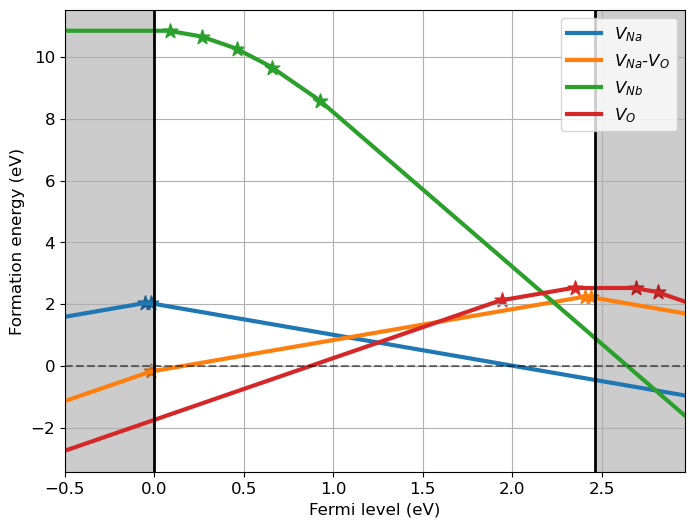

In [39]:
mu = res['X'] # choose chemical potentials

da_vac.plot(chemical_potentials=mu);

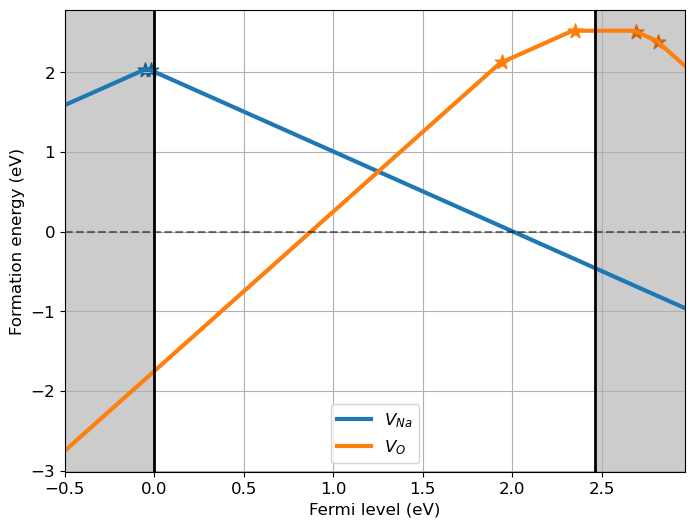

In [40]:
# Choose entries to plot

entries = da_vac.select_entries(types=['Vacancy'],elements=['Na','O'])
da_vac.plot(chemical_potentials=mu,entries=entries);

# Plot charge transition levels

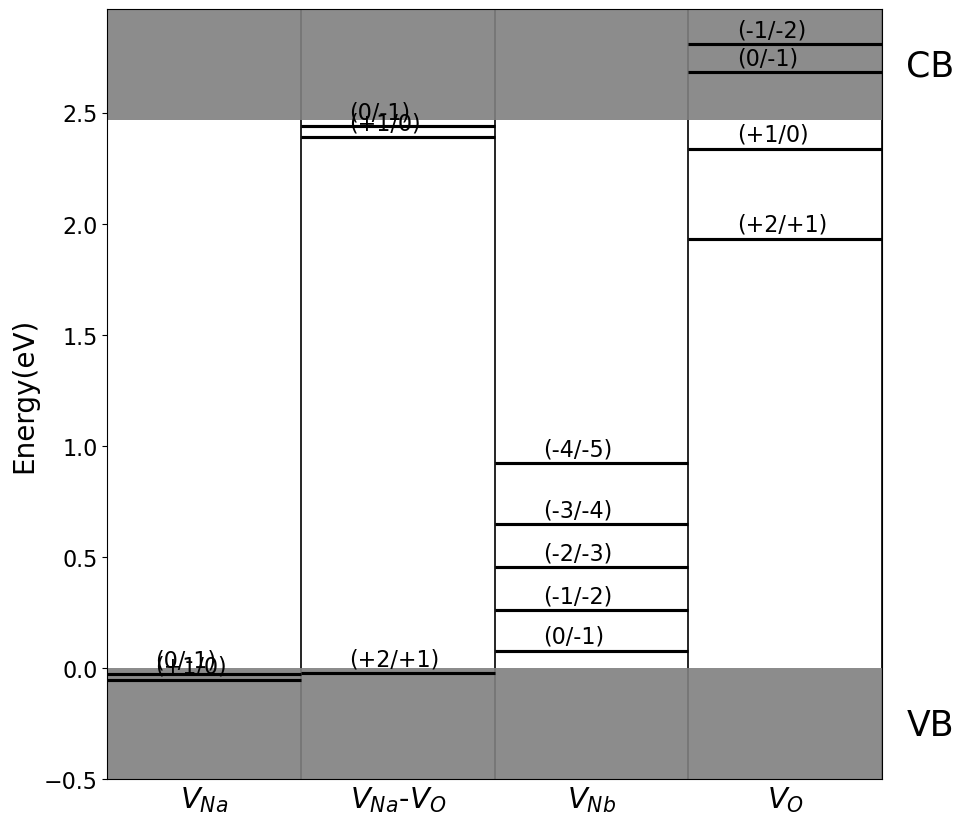

In [41]:
da_vac.plot_ctl();

# Plot binding energy

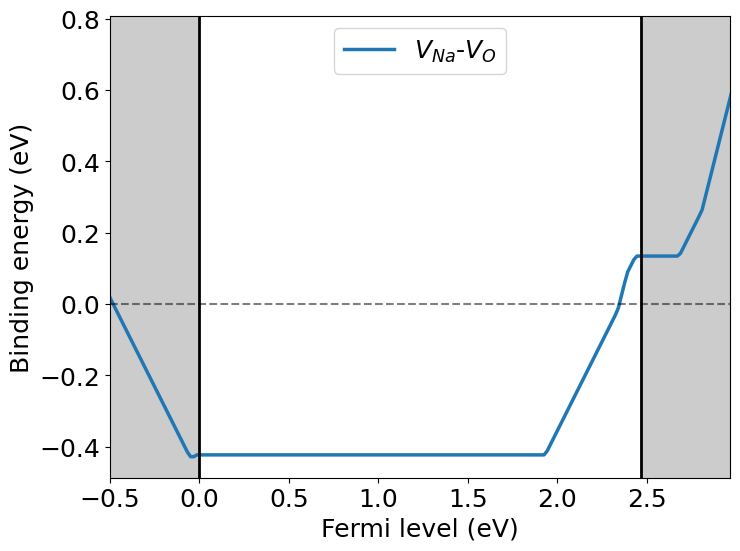

In [42]:
da_vac.plot_binding_energies();

## Compute the Fermi level and defect concentrations solving the charge neutrality condition

In [58]:
fermi_level = da_vac.solve_fermi_level(chemical_potentials=mu,bulk_dos=dos,temperature=300)
fermi_level

/nfshome/villa/pynter/pynter/defects/pmg/pmg_dos.py:1029: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp((fermi - E) / (_cd("Boltzmann constant in eV/K") * T)))


1.2670323276519775

In [63]:
concentrations = da_vac.defect_concentrations(chemical_potentials=mu,temperature=300,fermi_level=fermi_level)
concentrations

[charge=-1.0, conc=5.89e+09, name=Vac_Na, stable=True
charge=0.0, conc=1.02e-12, name=Vac_Na, stable=True
charge=1.0, conc=6.46e-35, name=Vac_Na, stable=True
charge=-1.0, conc=1.61e-34, name=Vac_Na-Vac_O, stable=True
charge=0.0, conc=7.48e-15, name=Vac_Na-Vac_O, stable=True
charge=1.0, conc=5.47e+04, name=Vac_Na-Vac_O, stable=True
charge=2.0, conc=1.16e-17, name=Vac_Na-Vac_O, stable=True
charge=-5.0, conc=4.10e-94, name=Vac_Nb, stable=True
charge=-4.0, conc=6.36e-100, name=Vac_Nb, stable=True
charge=-3.0, conc=2.55e-110, name=Vac_Nb, stable=True
charge=-2.0, conc=5.42e-124, name=Vac_Nb, stable=True
charge=-1.0, conc=6.74e-141, name=Vac_Nb, stable=True
charge=0.0, conc=7.08e-161, name=Vac_Nb, stable=True
charge=-2.0, conc=4.58e-70, name=Vac_O, stable=True
charge=-1.0, conc=3.56e-44, name=Vac_O, stable=True
charge=0.0, conc=2.00e-20, name=Vac_O, stable=True
charge=1.0, conc=1.95e-02, name=Vac_O, stable=True
charge=2.0, conc=2.94e+09, name=Vac_O, stable=True]

# The same works for the extended dataset

<module 'matplotlib.pyplot' from '/nfshome/villa/miniconda3/envs/recent/lib/python3.11/site-packages/matplotlib/pyplot.py'>

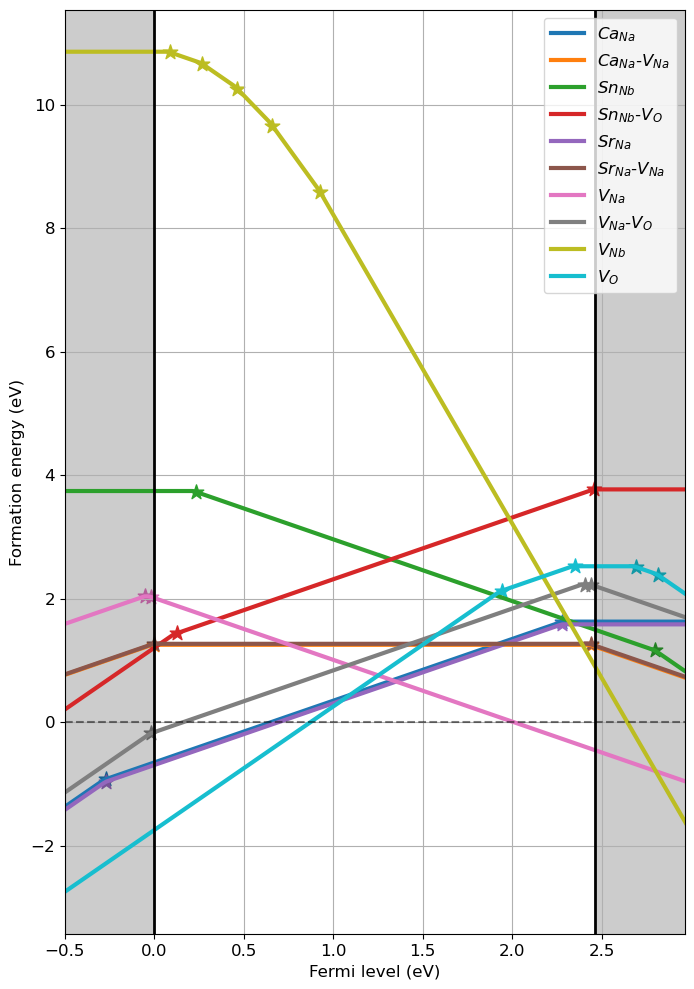

In [47]:
da.plot(mu,plotsize=(1,2))

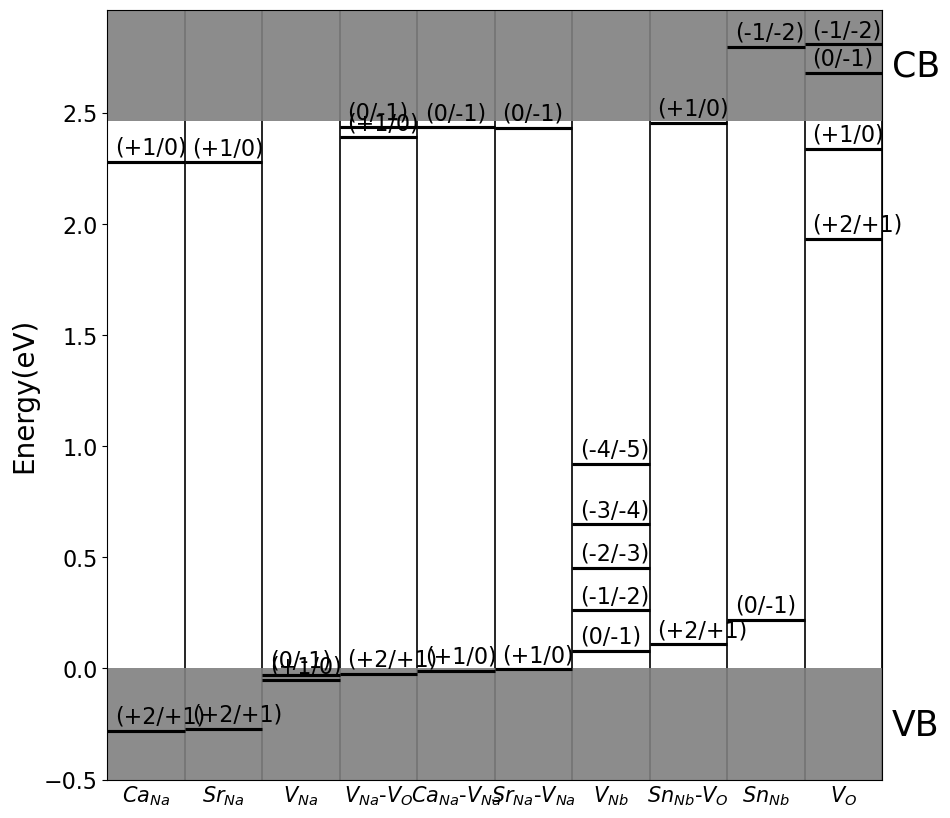

In [50]:
da.plot_ctl();

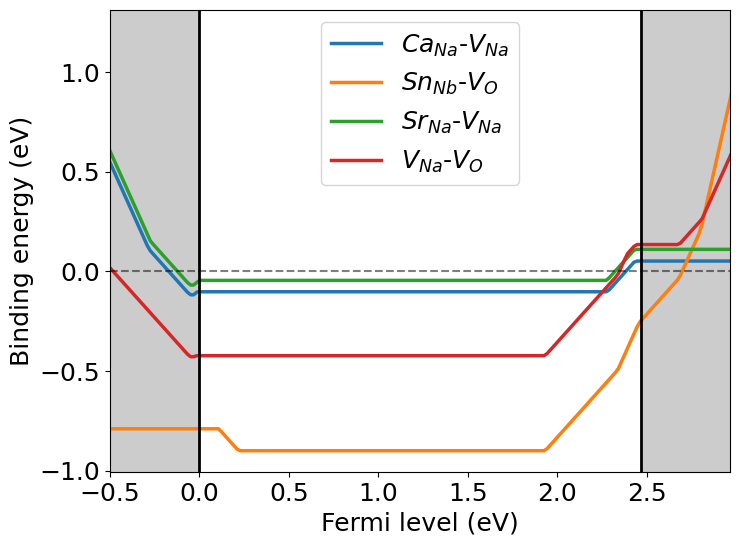

In [51]:
da.plot_binding_energies();